# Importing modules

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


# Preparing the data

In [5]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)

one_hot_test_labels = to_one_hot(test_labels)


# Or

In [7]:
one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


# Building Network

In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compile

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 185us/sample - loss: 2.8593 - acc: 0.4811 - val_loss: 1.8651 - val_acc: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 87us/sample - loss: 1.5124 - acc: 0.6956 - val_loss: 1.3762 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 86us/sample - loss: 1.1202 - acc: 0.7633 - val_loss: 1.2112 - val_acc: 0.7370
Epoch 4/20
7982/7982 [==============================] - 1s 86us/sample - loss: 0.8961 - acc: 0.8099 - val_loss: 1.0894 - val_acc: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.7182 - acc: 0.8489 - val_loss: 1.0335 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 88us/sample - loss: 0.5796 - acc: 0.8775 - val_loss: 0.9731 - val_acc: 0.8000
Epoch 7/20
7982/7982 [==============================] - 1s 91us/sample - loss: 0.4686 - acc: 0.8996 - val_loss: 0.9399 - val_acc:

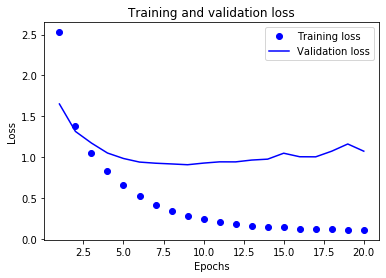

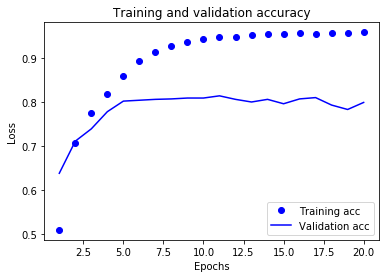

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [0]:
predictions = model.predict(x_test)

In [0]:
predictions.shape

(2246, 46)

In [0]:
predictions[1].sum()

1.0

In [0]:
predictions[1].argmax()

14

# Alternate approach for Labels instead of One hot encoding

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512)

Train on 8982 samples
Epoch 1/20
8982/8982 [==============================] - 2s 186us/sample - loss: 0.1504 - acc: 0.9529
Epoch 2/20
8982/8982 [==============================] - 1s 136us/sample - loss: 0.1075 - acc: 0.9567
Epoch 3/20
8982/8982 [==============================] - 1s 135us/sample - loss: 0.1108 - acc: 0.9550
Epoch 4/20
8982/8982 [==============================] - 1s 136us/sample - loss: 0.1083 - acc: 0.9558
Epoch 5/20
8982/8982 [==============================] - 1s 138us/sample - loss: 0.1051 - acc: 0.9567
Epoch 6/20
8982/8982 [==============================] - 1s 135us/sample - loss: 0.1028 - acc: 0.9562
Epoch 7/20
8982/8982 [==============================] - 1s 136us/sample - loss: 0.1046 - acc: 0.9549
Epoch 8/20
8982/8982 [==============================] - 1s 140us/sample - loss: 0.1024 - acc: 0.9562
Epoch 9/20
8982/8982 [==============================] - 1s 137us/sample - loss: 0.1017 - acc: 0.9559
Epoch 10/20
8982/8982 [==============================] - 1s 136us/sam

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions.shape

(2246, 46)

In [0]:
predictions[1].argmax()

10